# 상품속성 정보를 활용한 고객 클러스터링 v0.1
* 수행 목적: 모 남성복 브랜드 구매 고객들의 취향 군집별 특성을 파악하고 각 군집을 타겟으로 한 상품을 기획하는 것이 목적이다.
* 수행 방법: 각 고객의 상품속성별 구매횟수 또는 비중을 집계하고 K-means 알고리즘을 활용해 군집화를 수행하였다.
* 활용 데이터: 고객별 구매 내역, 상품속성 정보

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from patsy import dmatrix

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 고객별 구매내역
purchase = pd.read_excel("purchasehistory.xls")

# 상품속성 데이터
attributes = pd.read_excel("attributes.xlsx")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [4]:
purchase.head()

,CUST_ID,PROD_CD,PUR_QTY
0,14326,PAB584I1,3
1,14326,SHB201N2,2
2,14326,PAB582G3,1
3,16596,JUB103BK,1
4,29830,SHA101BK,1


In [5]:
attributes.head()

,PROD_CD,디자인,컬러,핏,출시,BIZ,NON-BIZ,PRICE
0,COD202I2,B,B,A,C,1,2,1
1,COD202N2,B,A,A,C,1,2,1
2,COD204K2,C,B,C,C,2,2,1
3,COD301BK,A,A,A,A,3,2,1
4,COD301S2,A,A,A,A,3,2,1


In [6]:
# 디자인, 컬러, 핏, 출시 데이터를 dummy variables로 변환
design = pd.DataFrame(dmatrix('디자인 + 0', attributes), columns=['디자인A', '디자인B', '디자인C'])
color = pd.DataFrame(dmatrix('컬러 + 0', attributes), columns=['컬러A', '컬러B'])
fit = pd.DataFrame(dmatrix('핏 + 0', attributes), columns=['핏A', '핏B', '핏C'])
launch = pd.DataFrame(dmatrix('출시 + 0', attributes), columns=['출시A', '출시B', '출시C'])

In [7]:
attributes = pd.concat([attributes, design, color, fit, launch], axis=1)
attributes.drop(['디자인', '컬러', '핏', '출시'], axis=1, inplace=True)
attributes.head()

,PROD_CD,BIZ,NON-BIZ,PRICE,디자인A,디자인B,디자인C,컬러A,컬러B,핏A,핏B,핏C,출시A,출시B,출시C
0,COD202I2,1,2,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,COD202N2,1,2,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,COD204K2,2,2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,COD301BK,3,2,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,COD301S2,3,2,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# 구매내역과 상품속성 데이터 통합
merged = pd.merge(purchase, attributes, on='PROD_CD')
merged.head()

,CUST_ID,PROD_CD,PUR_QTY,BIZ,NON-BIZ,PRICE,디자인A,디자인B,디자인C,컬러A,컬러B,핏A,핏B,핏C,출시A,출시B,출시C
0,14326,PAB584I1,3,3,3,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1538756,PAB584I1,1,3,3,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1684644,PAB584I1,1,3,3,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1998324,PAB584I1,1,3,3,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3526273,PAB584I1,1,3,3,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# 속성별 구매횟수 집계
for col in merged.columns[3:]:
    merged[col] = merged[col] * merged['PUR_QTY']
    
grouped = merged.groupby('CUST_ID').sum()
grouped.head()

,PUR_QTY,BIZ,NON-BIZ,PRICE,디자인A,디자인B,디자인C,컬러A,컬러B,핏A,핏B,핏C,출시A,출시B,출시C
CUST_ID,,,,,,,,,,,,,,,
156,6,10,16,6,2.0,3.0,1.0,4.0,2.0,3.0,1.0,2.0,1.0,3.0,2.0
406,3,1,9,2,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
505,1,0,3,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2241,2,6,6,2,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0
2841,1,0,3,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
# 1건의 구매이력만으로 취향을 특정할 수 없으로 구매수량이 2건 미만 고객 삭제
grouped.drop(grouped[grouped['PUR_QTY']<2].index, inplace=True)

In [11]:
# 속성별 구매비중 집계
for col in grouped.columns[1:]:
    grouped[col] = grouped[col] / grouped['PUR_QTY']

In [12]:
grouped.drop('PUR_QTY', axis=1, inplace=True)

In [13]:
grouped.head()

,BIZ,NON-BIZ,PRICE,디자인A,디자인B,디자인C,컬러A,컬러B,핏A,핏B,핏C,출시A,출시B,출시C
CUST_ID,,,,,,,,,,,,,,
156,1.666667,2.666667,1.000000,0.333333,0.500000,0.166667,0.666667,0.333333,0.500000,0.166667,0.333333,0.166667,0.5,0.333333
406,0.333333,3.000000,0.666667,0.333333,0.666667,0.000000,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.666667
2241,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.5,0.000000
3453,2.750000,3.000000,1.000000,0.750000,0.250000,0.000000,0.250000,0.750000,0.750000,0.000000,0.250000,0.000000,1.0,0.000000
5097,3.000000,3.000000,0.500000,1.000000,0.000000,0.000000,0.500000,0.500000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000


In [14]:
#Normalization
for col in grouped.columns[0:3]:
    grouped[col] = MinMaxScaler().fit_transform(grouped[[col]])

In [15]:
grouped.head()

,BIZ,NON-BIZ,PRICE,디자인A,디자인B,디자인C,컬러A,컬러B,핏A,핏B,핏C,출시A,출시B,출시C
CUST_ID,,,,,,,,,,,,,,
156,0.555556,0.833333,0.500000,0.333333,0.500000,0.166667,0.666667,0.333333,0.500000,0.166667,0.333333,0.166667,0.5,0.333333
406,0.111111,1.000000,0.333333,0.333333,0.666667,0.000000,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.666667
2241,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.5,0.000000
3453,0.916667,1.000000,0.500000,0.750000,0.250000,0.000000,0.250000,0.750000,0.750000,0.000000,0.250000,0.000000,1.0,0.000000
5097,1.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.500000,0.500000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000


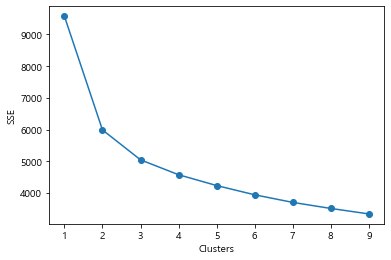

In [16]:
sse = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, algorithm='auto', init='k-means++', n_init=10, max_iter=300)
    km.fit(grouped)
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [17]:
km = KMeans(n_clusters=3, algorithm='auto', init='k-means++', n_init=10, max_iter=300)
y = pd.DataFrame(km.fit_predict(grouped), index=grouped.index, columns=['Cluster'])

In [18]:
result = pd.concat([grouped, y], axis=1)
result

,BIZ,NON-BIZ,PRICE,디자인A,디자인B,디자인C,컬러A,컬러B,핏A,핏B,핏C,출시A,출시B,출시C,Cluster
CUST_ID,,,,,,,,,,,,,,,
156,0.555556,0.833333,0.500000,0.333333,0.500000,0.166667,0.666667,0.333333,0.500000,0.166667,0.333333,0.166667,0.5,0.333333,2
406,0.111111,1.000000,0.333333,0.333333,0.666667,0.000000,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,0.666667,0
2241,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.5,0.000000,1
3453,0.916667,1.000000,0.500000,0.750000,0.250000,0.000000,0.250000,0.750000,0.750000,0.000000,0.250000,0.000000,1.0,0.000000,2
5097,1.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.500000,0.500000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72001512,0.333333,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1
85000742,0.777778,1.000000,0.333333,1.000000,0.000000,0.000000,0.666667,0.333333,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1
85005945,0.000000,1.000000,0.250000,0.000000,0.500000,0.500000,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,1.000000,0


In [19]:
result['Cluster'].value_counts()

2    3670
0    2871
1    2339
Name: Cluster, dtype: int64

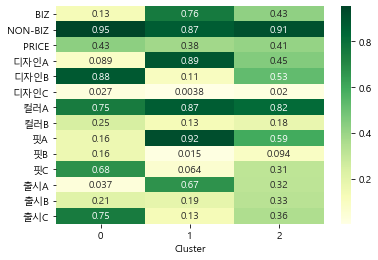

In [20]:
summary = result.groupby('Cluster').mean()
summary = summary.transpose()

sns.heatmap(summary, cbar=True, annot=True, cmap="YlGn")
plt.show()

In [21]:
# 클러스터의 개수를 8개로 변경
km2 = KMeans(n_clusters=8, algorithm='auto', init='k-means++', n_init=10, max_iter=300)
y2 = pd.DataFrame(km2.fit_predict(grouped), index=grouped.index, columns=['Cluster'])

In [22]:
result2 = pd.concat([grouped, y2], axis=1)

In [23]:
result2['Cluster'].value_counts()

1    2013
2    1808
3    1166
5    1154
4     847
6     838
7     555
0     499
Name: Cluster, dtype: int64

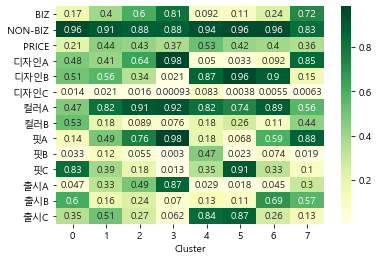

In [24]:
summary2 = result2.groupby('Cluster').mean()
summary2 = summary2.transpose()

sns.heatmap(summary2, cbar=True, annot=True, cmap="YlGn")
plt.show()

### 결과 해석
* 클러스터0(499명): 디자인보다는 컬러매치에 신경 쓰며 새로운 핏에 대한 선호도가 높은 집단
* 클러스터1(2013명): 클러스터0과 비슷하지만 컬러와 핏의 선택에 있어서는 상대적으로 보수적인 집단
* 클러스터2(1808명): 다소 보수적이지만 트렌디한 상품도 종종 소비하는 집단
* 클러스터3(1166명): 가장 보수적이고 비즈니스물의 구매가 가장 높은 집단
* 클러스터4(847명): 매우 트렌디하며 새로운 오버핏 선호도가 높은 집단
* 클러스터5(1154명): 매우 트렌디하며 새로운 핏에 대한 선호도가 매우 높은 집단
* 클러스터6(838명): 트렌디하지만 검증된 트렌드를 따르는 집단
* 클러스터7(555명): 매우 보수적이지만 컬러매치에 신경 쓰는 집단